### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# make request to website for data
res = requests.get('https://covid19.ncdc.gov.ng/')
status_code = res.status_code
text = res.text

if status_code == 200:
    soup = BeautifulSoup(text, 'lxml')
    table_html = soup.find_all('table', {'id':'custom1'})
    data = pd.read_html(str(table_html))[0]
else:
    print("Unable to fetch data from URL.")

In [3]:
# Saving the data into a DataFrame object.
data = pd.DataFrame(data)

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [4]:
#Global Daily Confirmed Cases
Confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# Confirmed_df.head()

In [5]:
# Global Daily Recovered Cases 
Recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
# Recovered_df.head()

In [6]:
# Global Daily Death Cases
Death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
# Death_df.head()

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [7]:
#Importing the external data
Budget_df = pd.read_csv("Budget data.csv")
CovidExt_df = pd.read_csv("covid_external.csv")
CovidNig_df = pd.read_csv("covidnig.csv")
Real_df = pd.read_csv("RealGDP.csv")

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [8]:
#[Write Your Code Here]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [9]:
#[Write Your Code Here]
data = pd.DataFrame(data)

In [10]:
Data = data.rename(columns={'States Affected': 'STATES', 'No. of Cases (Lab Confirmed)': 'CASES', 'No. of Cases (on admission)': 'HOSPITALISED', 'No. Discharged': 'RECOVERED', 'No. of Deaths': 'DEATHS'})

In [11]:
Data.head()

,STATES,CASES,HOSPITALISED,RECOVERED,DEATHS
0,Lagos,76700,3686,72350,664
1,FCT,21888,1128,20576,184
2,Rivers,12126,359,11613,154
3,Kaduna,9646,176,9397,73
4,Plateau,9381,98,9218,65


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [12]:
Confirmed_df.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
Confirmed_df.rename(columns = {"Country/Region": "Country"}, inplace = True)
Nigeria_confirmed = Confirmed_df[Confirmed_df["Country"] == "Nigeria"]
Nigeria_confirmed

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21
202,Nigeria,0,0,0,0,0,0,0,0,0,...,202191,202704,203081,203514,203991,204201,204456,204752,205047,205484


In [13]:
columns = Nigeria_confirmed.iloc[:, 4:]

Nigeria_confirmed_df = Nigeria_confirmed.melt(value_vars=columns, var_name="Date", value_name="Cases")
Nigeria_confirmed_df["Date"] = Nigeria_confirmed_df["Date"].apply(pd.to_datetime, errors='coerce')

Nigeria_confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    614 non-null    datetime64[ns]
 1   Cases   614 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.7 KB


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [14]:
Recovered_df.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
Recovered_df.rename(columns = {"Country/Region": "Country"}, inplace = True)
Nigeria_recovered = Recovered_df[Recovered_df["Country"] == "Nigeria"]

In [15]:
columns = Nigeria_recovered.iloc[:, 4:]

Nigeria_recovered_df = Nigeria_recovered.melt(value_vars=columns, var_name="Date", value_name="Cases")
Nigeria_recovered_df["Date"] = Nigeria_recovered_df["Date"].apply(pd.to_datetime, errors='coerce')

Nigeria_recovered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    614 non-null    datetime64[ns]
 1   Cases   614 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.7 KB


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [16]:
Death_df.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
Death_df.rename(columns = {"Country/Region": "Country"}, inplace = True)
Nigeria_death = Death_df[Death_df["Country"] == "Nigeria"]

In [17]:
columns = Nigeria_death.iloc[:, 4:]

Nigeria_death_df = Nigeria_death.melt(value_vars=columns, var_name="Date", value_name="Cases")
Nigeria_death_df["Date"] = Nigeria_death_df["Date"].apply(pd.to_datetime, errors='coerce')

Nigeria_death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    614 non-null    datetime64[ns]
 1   Cases   614 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.7 KB


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

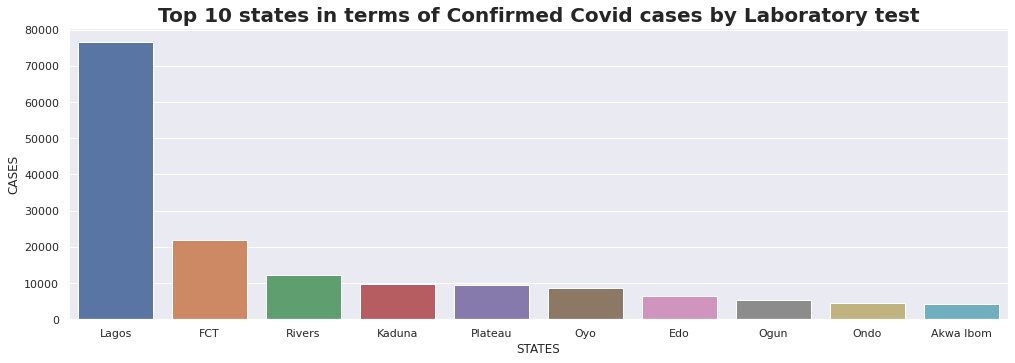

In [153]:
Top10_confirm = Data.sort_values(by=['CASES'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'STATES', y= 'CASES', data = Top10_confirm).set_title("Top 10 states in terms of Confirmed Covid cases by Laboratory test", fontdict = { 'fontsize': 20, 'weight':'bold'});

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

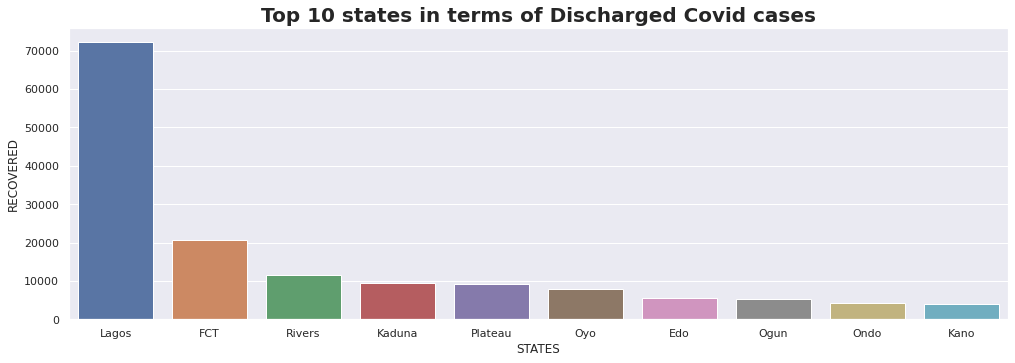

In [154]:
Top10_recovered = Data.sort_values(by=['RECOVERED'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'STATES', y= 'RECOVERED', data = Top10_recovered).set_title("Top 10 states in terms of Discharged Covid cases", fontdict = { 'fontsize': 20, 'weight':'bold'});

TODO D - Plot the top 10 Death cases

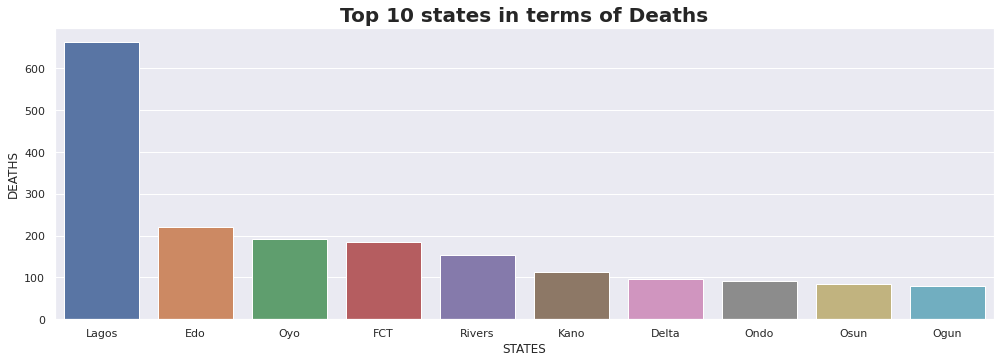

In [155]:
Top10_death= Data.sort_values(by=['DEATHS'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'STATES', y= 'DEATHS', data = Top10_death).set_title("Top 10 states in terms of Deaths", fontdict = { 'fontsize': 20, 'weight':'bold'});

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

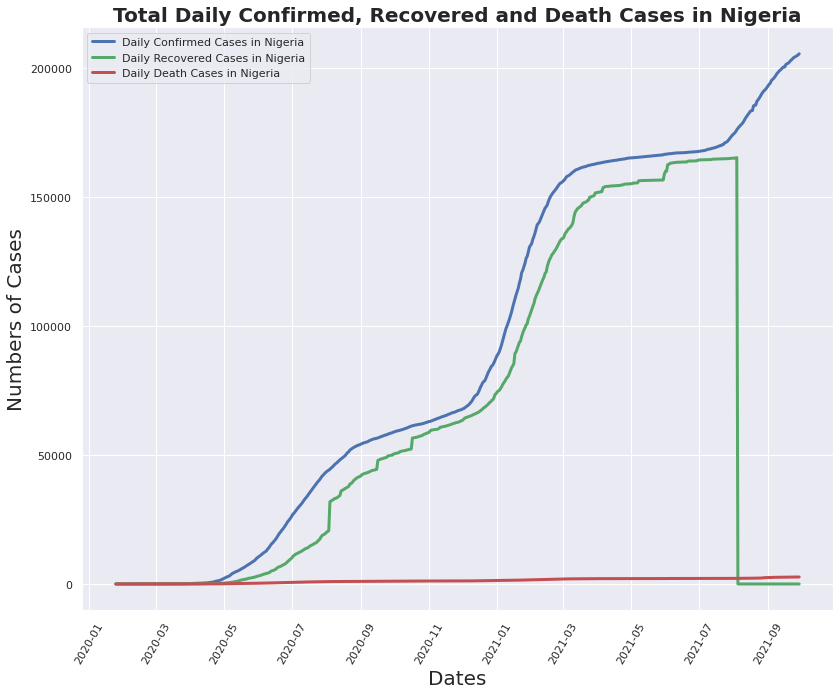

In [152]:
# Line Plot For Total Daily Confirmed, Recovered and Death Cases in Nigeria.
sns.set(rc={'figure.figsize':(12,10)})

sns.lineplot(Nigeria_confirmed_df.Date, Nigeria_confirmed_df.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="b", markers="o")

sns.lineplot(Nigeria_recovered_df.Date, Nigeria_recovered_df.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="g")

sns.lineplot(Nigeria_death_df.Date, Nigeria_death_df.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="r")

#Title, labels and legend.
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Numbers of Cases", fontsize=20)
plt.xticks(rotation=60)
plt.title ("Total Daily Confirmed, Recovered and Death Cases in Nigeria", fontsize=20, weight='bold')
plt.show()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

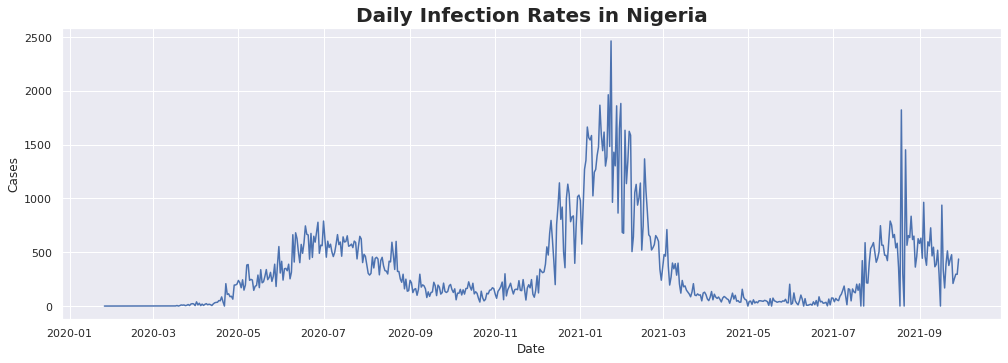

In [151]:
# Daily Infection Rate

Nigeria_daily_infection_rate = Nigeria_confirmed_df.Cases.diff()
plt.figure(figsize=(15,5))
sns.lineplot(Nigeria_confirmed_df.Date, Nigeria_daily_infection_rate).set_title("Daily Infection Rates in Nigeria", fontdict = { 'fontsize': 20, 'weight':'bold'});

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [23]:
# Maximum Infection

Nigeria_confirmed_df["Daily Infection Rate"] = Nigeria_confirmed_df["Cases"].diff()
Max_infection = Nigeria_confirmed_df["Daily Infection Rate"].max()
Max_infection

2464.0

In [24]:
# Date Of Maximum Infection Rate

Max_infection_date = Nigeria_confirmed_df.loc[(Nigeria_confirmed_df["Daily Infection Rate"] == Max_infection), "Date"]
Max_infection_date

364   2021-01-23
Name: Date, dtype: datetime64[ns]

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [25]:
CovidExt_df = CovidExt_df.rename(columns={"states":"STATES"})

In [26]:
# Combining External Dataset On State

Combined_data = pd.merge(Data, CovidExt_df, on='STATES')

In [27]:
Top10_df = Combined_data.sort_values(by='CASES', ascending=False)

In [28]:
Top10_df = Combined_data.nlargest(10, 'CASES')

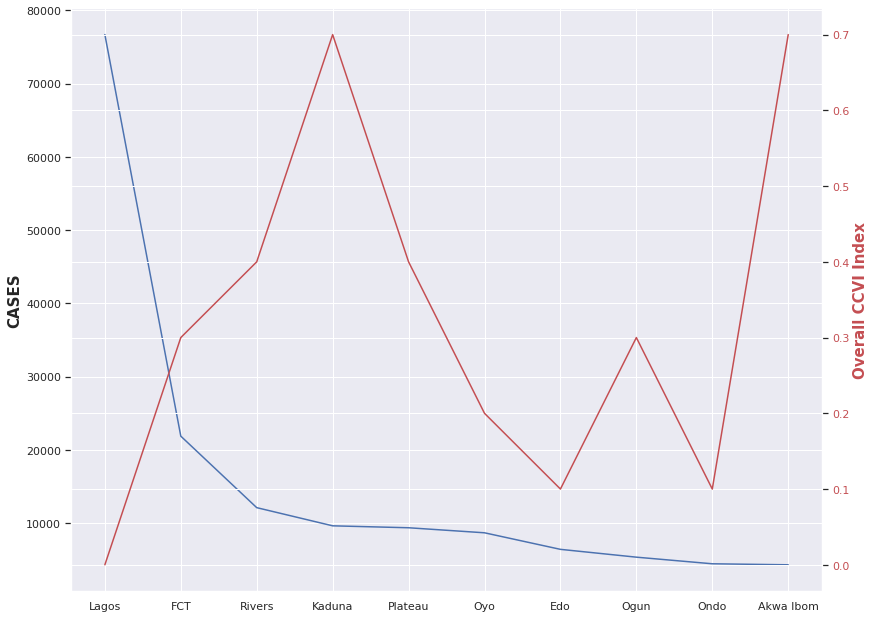

In [150]:
# Line Plot For Top_10 Cases And Overall CCVI Index

x = Top10_df["STATES"]
y1 = Top10_df["CASES"]
y2 = Top10_df["Overall CCVI Index"]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('CASES', fontsize=15, weight='bold')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r', fontsize=15, weight='bold')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# MY OBSERVATION

In [30]:
# Observation


TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

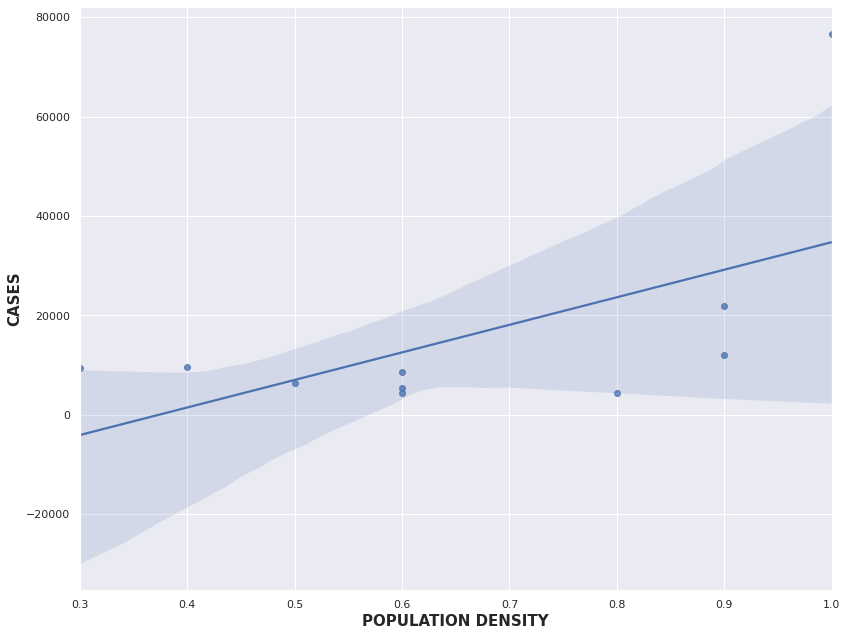

In [122]:
# Regression Plot For Confirmed Cases And Population Density.
ax = sns.regplot(x="Population Density", y="CASES", data=Top10_df)
# Labels
plt.xlabel("POPULATION DENSITY", fontsize=15, weight='bold')
plt.ylabel("CASES", fontsize=15, weight='bold')
# Show Plot
plt.show()

# MY OBSERVATION

In [32]:
# Observation
As the population density tends to be increasing the cases also increases.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [33]:
Nigeria_confirmed_df.describe()

,Cases,Daily Infection Rate
count,614.000000,613.000000
mean,90377.456026,335.210440
std,69864.950399,389.290665
min,0.000000,0.000000
25%,23492.750000,53.000000
50%,67097.000000,191.000000
75%,165039.500000,499.000000
max,205484.000000,2464.000000


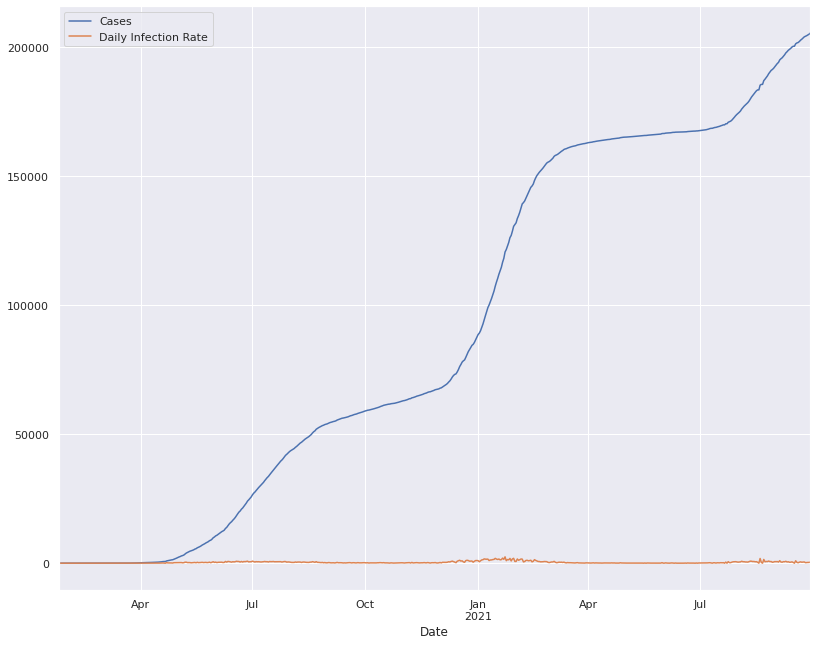

In [127]:
# Plotting the graph.
Nigeria_confirmed_df.plot(x="Date", y=["Cases", "Daily Infection Rate"])

# Show Plot
plt.show()

# My Observation

In [ ]:
"""Since when the infection as started, the cases as been increasing while the daily infection rate remains in position."""

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [35]:
#Barplot For Real GDP Data

In [139]:
df_melted = pd.melt(Real_df, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'])

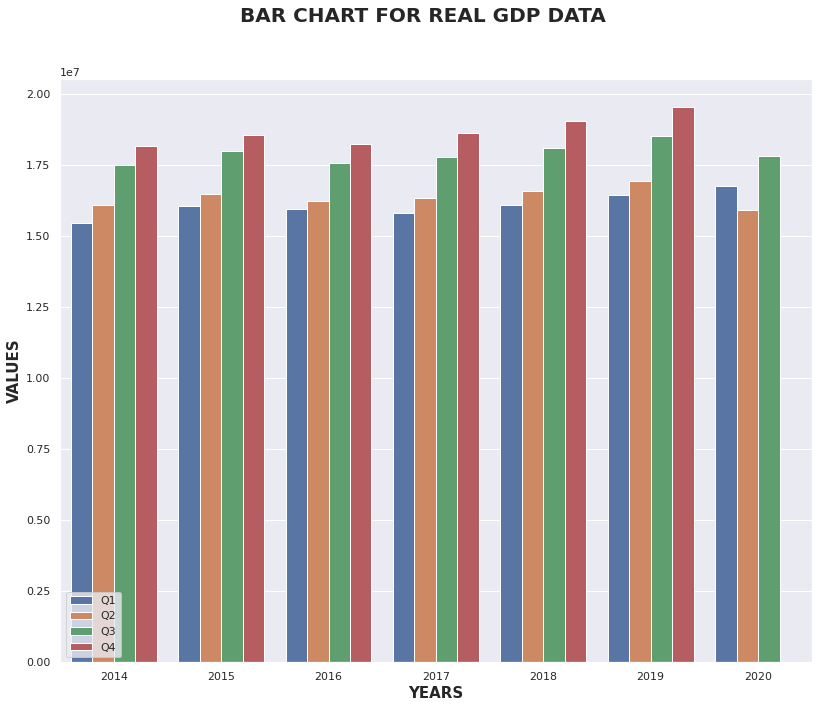

In [147]:
# Barplot
graph = sns.barplot(data=df_melted, x='Year', y='value', hue='variable')
# Legend
plt.legend(loc='lower left')
# Labeling the axis
plt.xlabel("YEARS", fontsize=15, weight='bold')
plt.ylabel("VALUES", fontsize=15, weight='bold')

# Adding Suptitle
plt.suptitle("BAR CHART FOR REAL GDP DATA", fontsize=20, weight='bold')

# Show Plot
plt.show()
graph.axhline(13)

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [39]:
# Using The Extracted Data.
df1 = Data["STATES"]
df2 = Data["CASES"]

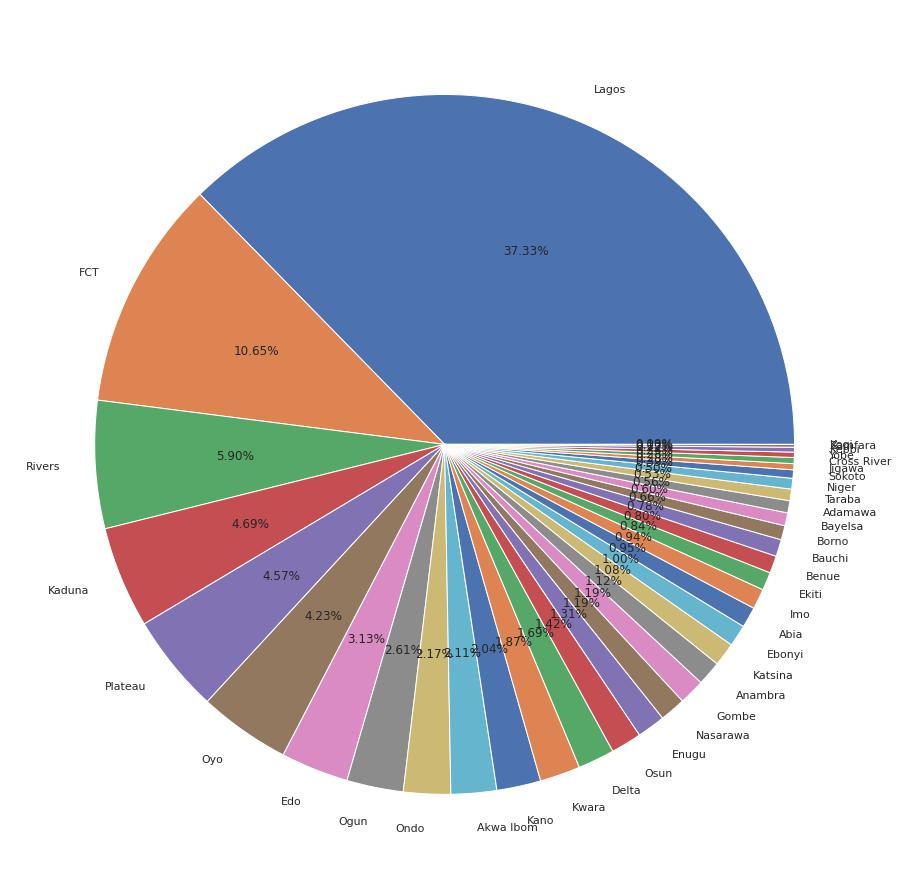

In [148]:
# Creating Pie Plot
fig = plt.figure(figsize =(20, 15))
plt.pie(df2, labels = df1, autopct='%1.2f%%')
  
# Show Plot
plt.show()

In [ ]:
# Bar Plot For Budget (External Data).

In [101]:
df = pd.melt(Budget_df, id_vars=['states'], value_vars=['Initial_budget (Bn)', 'Revised_budget (Bn)'])

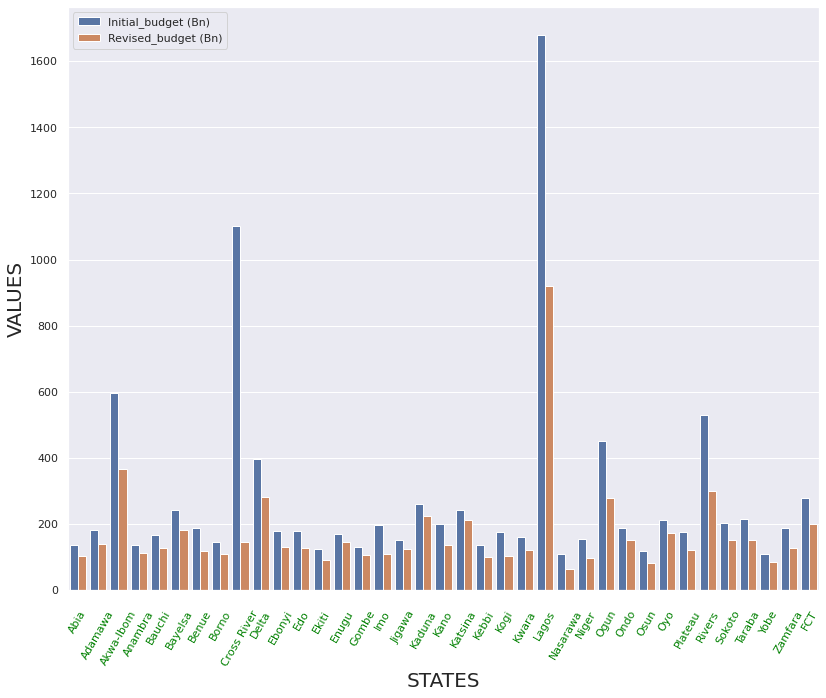

In [102]:
# Plotting The Graph
sns.barplot(data=df, x='states', y='value', hue='variable')
plt.legend(loc='upper left')
# Labeling The Axis
plt.xlabel("STATES", fontsize=20)
plt.ylabel("VALUES", fontsize=20)
# Custom Ticks
plt.tick_params(axis='x', colors='green', direction='out', length=10, rotation=60, size=15)
# Show The Graph
plt.show()

In [136]:
# Creating The Variable
a = Data["CASES"].sum()
b = Data["HOSPITALISED"].sum()
c = Data["RECOVERED"].sum()
d = Data["DEATHS"].sum()
# Creating The Labels
e = ("CASES", "HOSPITALISED", "RECOVERED", "DEATHS")

# Setting Into Another Variable
df = (a, b, c, d)

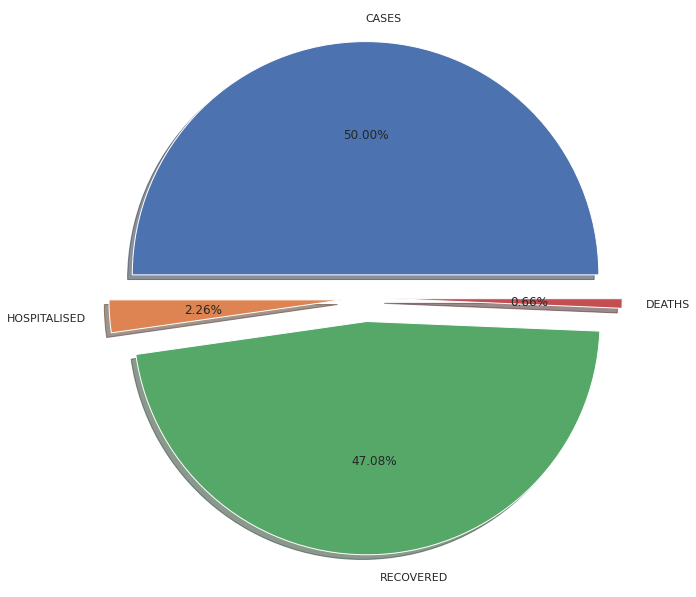

In [137]:
# Plotting The Chart
plt.pie(df, labels = e, shadow=True, explode=(0.1,0.1,0.1,0.1), autopct='%1.2f%%')
# Show Plot
plt.show()